# Imbalanced Data

**Dengesiz veri**, bir sınıflandırma probleminde, sınıflar arasında örnek sayısının belirgin bir şekilde farklı olduğu durumları ifade eder. Örneğin, bir veri setinde pozitif sınıf sadece %5, negatif sınıf ise %95 oranında yer alıyorsa, bu veri seti dengesiz kabul edilir. Dengesiz veriler, modelin çoğunluk sınıfına yönelik eğilim göstermesine ve dolayısıyla azınlık sınıfının göz ardı edilmesine neden olabilir, bu da yanlış sınıflandırmalara yol açar. Diğer bir ifadeyle elde edilen %95'lik doğruluk (accuracy) dereceleri yanıltıcı olabilir.

![Balanced - Imbalanced](imbalanced.png)

## Dengesiz Veri ile Başa Çıkma Yöntemleri

### Örnekleme Yöntemleri

* **Alt Örnekleme (Undersampling)** : Çoğunluk sınıfına ait örneklerin sayısını azaltarak dengesizlik oranını dengeleme yöntemidir.

| Avantajlar | Dezavantajlar |
| ---------- | ------------- |
| Hızlıdır ve daha az bellek kullanır | Önemli verilerin kaybına neden olabilir |
| Modelin daha dengeli bir veri seti üzerinde eğitilmesini sağlar | Modelin genel performansını olumsuz etkileyebilir |


* **Üst Örnekleme (Oversampling)**: Azınlık sınıfına ait örneklerin sayısını artırarak dengesizlik oranını dengeleme yöntemidir. Bu, mevcut azınlık örneklerini çoğaltarak veya yeni yapay örnekler üreterek gerçekleştirilir.

| Avantajlar | Dezavantajlar |
| ---------- | ------------- |
| Önemli bilgilerin kaybını önler | Aşırı uyum (overfitting) riskini artırabilir|
| Azınlık sınıfını daha iyi temsil eder | Hesaplama maliyeti yükselebilir |

![Sampling Methods](https://www.turintech.ai/wp-content/uploads/2022/01/insights-13-4-1.png)


## Uygulama

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("hr_data.csv")

In [2]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


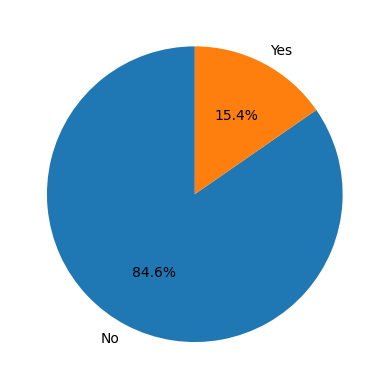

In [3]:
# Attrition alanındaki verilerin dağılımına bakalım

plt.pie(df['Attrition'].value_counts(), labels=df['Attrition'].value_counts().index, autopct='%1.1f%%', startangle=90);

## Alt Örnekleme

In [4]:

# Azınlık ve çoğunluk sınıflarını ayırma
majority_class = df[df['Attrition'] == 'No']
minority_class = df[df['Attrition'] == 'Yes']
majority_class.shape, minority_class.shape

((1020, 35), (185, 35))

In [5]:
# Alt örnekleme: Çoğunluk sınıfından rastgele örnek alma
majority_class_sampled = majority_class.sample(len(minority_class), random_state=42)
majority_class_sampled.shape

(185, 35)

In [6]:
# Yeni veri setini birleştirme
udf = pd.concat([majority_class_sampled, minority_class])

# Karıştırma
udf = udf.sample(frac=1).reset_index(drop=True)
udf.shape

(370, 35)

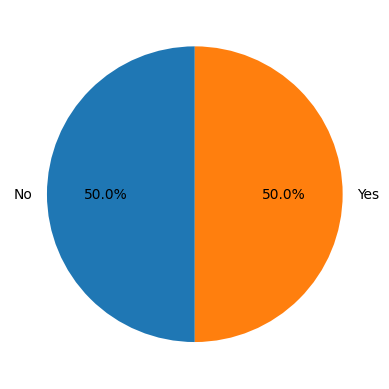

In [7]:
# Güncel verilerin dağılımına bakalım

plt.pie(udf['Attrition'].value_counts(), labels=udf['Attrition'].value_counts().index, autopct='%1.1f%%', startangle=90);

In [8]:
# Yeni verilerle sınıflandırma modeli geliştirelim

x=udf.drop("Attrition", axis=1) 
y=udf[["Attrition"]]
x=pd.get_dummies(x, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 42)

In [9]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
tahmin = rf.predict(x_test)
accuracy_score(y_test, tahmin)

0.7027027027027027

In [10]:
confusion_matrix(y_test, tahmin)

array([[28,  9],
       [13, 24]])

In [11]:
print(classification_report(y_test, tahmin))

              precision    recall  f1-score   support

          No       0.68      0.76      0.72        37
         Yes       0.73      0.65      0.69        37

    accuracy                           0.70        74
   macro avg       0.71      0.70      0.70        74
weighted avg       0.71      0.70      0.70        74



## Üst Örnekleme

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
# 'Attrition' sütununu sayısal hale getirme
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

# Dengesiz sınıf dağılımı
print("Orijinal dağılım:")
print(df['Attrition'].value_counts())

Orijinal dağılım:
Attrition
0.0    1020
1.0     185
Name: count, dtype: int64


In [14]:
odf = df.dropna()

x=odf.drop("Attrition", axis=1) 
y=odf[["Attrition"]]

x=pd.get_dummies(x, drop_first=True)

In [15]:
# SMOTE ile üst örnekleme yapma

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

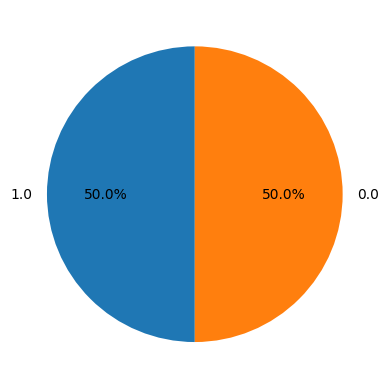

In [16]:
# Güncel verilerin dağılımına bakalım

plt.pie(y_resampled['Attrition'].value_counts(), labels=y_resampled['Attrition'].value_counts().index, autopct='%1.1f%%', startangle=90);

In [17]:
# Dengeli sınıf dağılımı
print(y_resampled['Attrition'].value_counts())

Attrition
1.0    1020
0.0    1020
Name: count, dtype: int64


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=.2, random_state = 42)

In [19]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
tahmin = rf.predict(x_test)
accuracy_score(y_test, tahmin)

0.9436274509803921

In [20]:
confusion_matrix(y_test, tahmin)

array([[200,   8],
       [ 15, 185]])

In [21]:
print(classification_report(y_test, tahmin))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       208
         1.0       0.96      0.93      0.94       200

    accuracy                           0.94       408
   macro avg       0.94      0.94      0.94       408
weighted avg       0.94      0.94      0.94       408



# Son Söz

- **Alt Örnekleme** yönteminde model, sınıfları ayırt etmekte daha zayıf bir performans gösterirken, **Üst Örnekleme** yöntemi ile modelin genel performansı belirgin şekilde artmıştır. Üst örnekleme, azınlık sınıfın örneklerini artırarak modelin her iki sınıfı da daha iyi öğrenmesini sağlamıştır.
- Sonuç olarak, üst örnekleme yöntemi, dengesiz veri setlerinde daha etkili bir yaklaşım olarak görünmektedir.